In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
from google.colab import files
uploaded = files.upload()
df = uploaded
df = pd.read_csv('AirQualityUCI(1).csv')
df.head()

Saving AirQualityUCI(1).csv to AirQualityUCI(1).csv


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,3/10/2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,3/10/2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,3/10/2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1554.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,3/10/2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,3/10/2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
df.drop(['Unnamed: 15', 'Unnamed: 16'],axis= 1, inplace = True)

In [4]:
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [5]:
df.dropna(how = 'all',inplace = True)

In [6]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [7]:
df['PT08_feat'] = ( df['PT08.S2(NMHC)'] + df['PT08.S1(CO)'] + df['PT08.S4(NO2)'] + df['PT08.S5(O3)']) / 4

In [8]:
df.drop(columns=['PT08.S1(CO)', 'PT08.S2(NMHC)','PT08.S4(NO2)', 'PT08.S5(O3)','AH','NMHC(GT)'],axis=1,inplace=True)

In [9]:
df.loc[df.PT08_feat == -200, 'PT08_feat'] = df.PT08_feat.mean()
df.loc[df['CO(GT)'] == -200, 'CO(GT)'] = df['CO(GT)'].mean()
df.loc[df['RH'] == -200, 'RH'] = df['RH'].mean()
df.loc[df['C6H6(GT)'] == -200, 'C6H6(GT)'] = df['C6H6(GT)'].mean()
df.loc[df['PT08.S3(NOx)'] == -200, 'PT08.S3(NOx)'] = df['PT08.S3(NOx)'].mean()
df.loc[df['NO2(GT)'] == -200, 'NO2(GT)'] = df['NO2(GT)'].mean()
df.loc[df['T'] == -200, 'T'] = df['T'].mean()
df.loc[df['NOx(GT)'] == -200, 'NOx(GT)'] = df['NOx(GT)'].mean()

In [10]:
df['Datetime'] = pd.to_datetime(df['Date'].apply(str)+' '+df['Time'])

In [11]:
df.drop(columns=['Date','Time'],axis = 1,inplace=True)

In [12]:
 df.set_index(df.Datetime, inplace = True)

In [13]:
df.head()

,CO(GT),C6H6(GT),NOx(GT),PT08.S3(NOx),NO2(GT),T,RH,PT08_feat,Datetime
Datetime,,,,,,,,,
2004-03-10 18:00:00,2.6,11.9,166.0,1056.0,113.0,13.6,48.9,1341.50,2004-03-10 18:00:00
2004-03-10 19:00:00,2.0,9.4,103.0,1174.0,92.0,13.3,47.7,1194.50,2004-03-10 19:00:00
2004-03-10 20:00:00,2.2,9.0,131.0,1140.0,114.0,11.9,54.0,1242.25,2004-03-10 20:00:00
2004-03-10 21:00:00,2.2,9.2,172.0,1092.0,122.0,11.0,60.0,1277.75,2004-03-10 21:00:00
2004-03-10 22:00:00,1.6,6.5,131.0,1205.0,116.0,11.2,59.6,1177.00,2004-03-10 22:00:00


In [14]:
df.dtypes

CO(GT)                 float64
C6H6(GT)               float64
NOx(GT)                float64
PT08.S3(NOx)           float64
NO2(GT)                float64
T                      float64
RH                     float64
PT08_feat              float64
Datetime        datetime64[ns]
dtype: object

# Time series

In [15]:
def cutbyweeks(x):
  a = []
  i=0
  j=168
  while j < 9000:
    a.append(x.iloc[i:j])
    i=j
    j += 168
  return a

In [16]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 4

### RH

In [17]:
bomba = cutbyweeks(df['RH'])

In [18]:
new = np.array(bomba)
new.shape

(53, 168)

In [19]:
y = []

for i in range(53):
  if i <= 53/2:
    y.append(0)
  else:
    y.append(1)

In [20]:
y = np.array(y)

In [21]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1])

In [22]:
X = np.array(new)

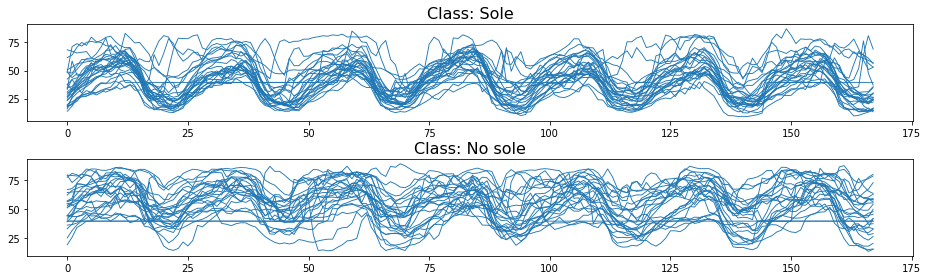

In [23]:
plt.figure()
for i, classe in enumerate(['Sole', 'No sole']):
    plt.subplot(2, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [24]:
!pip install tslearn

     |████████████████████████████████| 778kB 9.1MB/s 


In [25]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score, recall_score, precision_score

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100,stratify = y)

In [27]:
from keras.optimizers import Adagrad
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict

from tslearn.preprocessing import TimeSeriesScalerMinMax

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


In [28]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 42
ts_sz 168
n_classes 2
shapelet_sizes {16: 3}


In [29]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

/usr/local/lib/python3.6/dist-packages/tslearn/shapelets.py:363: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  FutureWarning)


In [30]:
shp_clf.fit(X_train, y_train)

Epoch 1/200
1/1 [==============================] - 0s 3ms/step - loss: 56.1469 - binary_accuracy: 0.5000 - binary_crossentropy: 56.1371
Epoch 2/200
1/1 [==============================] - 0s 1ms/step - loss: 4.5511 - binary_accuracy: 0.6429 - binary_crossentropy: 4.5447
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 2.3319 - binary_accuracy: 0.7619 - binary_crossentropy: 2.3260
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 1.9632 - binary_accuracy: 0.7619 - binary_crossentropy: 1.9578
Epoch 5/200
1/1 [==============================] - 0s 1ms/step - loss: 1.8564 - binary_accuracy: 0.7143 - binary_crossentropy: 1.8513
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 1.8870 - binary_accuracy: 0.7619 - binary_crossentropy: 1.8822
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 2.4661 - binary_accuracy: 0.6429 - binary_crossentropy: 2.4617
Epoch 8/200
1/1 [==============================] - 0s 1ms/st

LearningShapelets(batch_size=256, max_iter=200, max_size=None,
                  n_shapelets_per_size={16: 3}, optimizer='sgd',
                  random_state=None, scale=False, shapelet_length=0.15,
                  total_lengths=3, verbose=1, weight_regularizer=0.01)

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
predicted_labels = shp_clf.predict(X_test)
print("Correct classification rate:", accuracy_score(y_test, predicted_labels))

1/1 [==============================] - 0s 1ms/step
Correct classification rate: 0.6363636363636364


In [33]:
predicted_locations = shp_clf.locate(X_test)

1/1 [==============================] - 0s 3ms/step


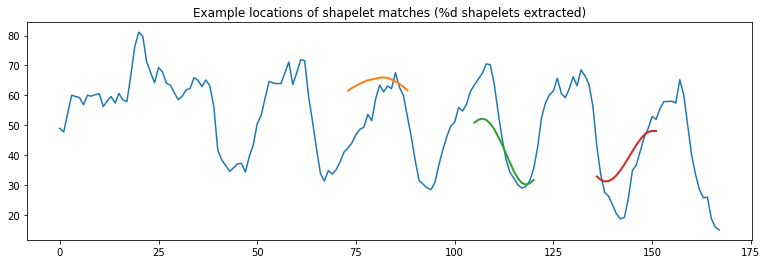

In [34]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

### shapelet transform

In [35]:
!pip install pyts

     |████████████████████████████████| 2.5MB 8.8MB/s 


In [36]:
from pyts.transformation import ShapeletTransform

In [37]:
st = ShapeletTransform(n_shapelets=3, window_sizes=[8])
st.fit(X, y)

ShapeletTransform(criterion='mutual_info', n_jobs=None, n_shapelets=3,
                  random_state=None, remove_similar=True, sort=False, verbose=0,
                  window_sizes=[8], window_steps=None)

In [38]:
len(st.shapelets_)

3

In [39]:
st.shapelets_

array([[44.2, 40. , 29.7, 24.1, 24.1, 20.4, 21.3, 18.9],
       [60. , 50.6, 40.5, 34.4, 28.2, 28.7, 24.9, 17.8],
       [22.6, 24.8, 25.4, 24.5, 28.6, 32.9, 39.8, 41.5]])

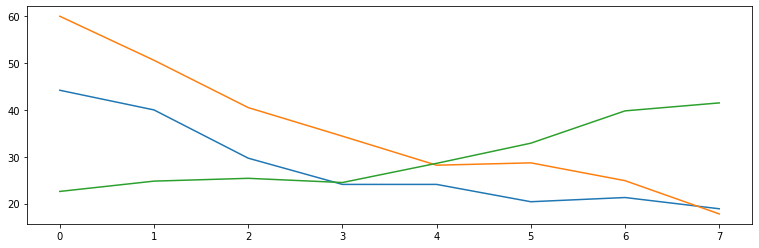

In [40]:
for s in st.shapelets_:
    plt.plot(s)

plt.show()

In [41]:
st.indices_

array([[ 12, 110, 118],
       [  1,  14,  22],
       [  4,  20,  28]])

In [42]:
X[2][55:63]

array([57.8, 62.1, 63.5, 64.8, 58.9, 66.6, 62.9, 63.9])

In [43]:
st.scores_

array([0.40345896, 0.41121836, 0.40521525])

### shapelet discovery

In [48]:
!pip install learningshapelets

ERROR: Could not find a version that satisfies the requirement learningshapelets (from versions: none)
ERROR: No matching distribution found for learningshapelets


In [45]:
from pyts.classification import LearningShapelets

In [46]:
shp_clf = LearningShapelets(random_state=42, tol=0.01)

In [47]:
shp_clf.fit(X, y)

KeyboardInterrupt: ignored

In [ ]:
len(shp_clf.shapelets_[0])

In [ ]:
from pyts.utils import windowed_view

In [ ]:
# Select three shapelets
sel_shapelets = np.asarray([shp_clf.shapelets_[0, 0], 
                        shp_clf.shapelets_[0, 1], 
                        shp_clf.shapelets_[0, 2]])

In [ ]:
plt.plot(sel_shapelets[0])
plt.plot(sel_shapelets[1])
plt.plot(sel_shapelets[2])

plt.show()

In [ ]:
# Derive the distances between the time series and a shapelets
shapelet_size = sel_shapelets.shape[1]
X_window = windowed_view(X, window_size=shapelet_size, window_step=1)
X_dist = np.mean((X_window[:, :, None] - sel_shapelets[None, :]) ** 2, axis=3).min(axis=1)

In [ ]:
X_dist

In [ ]:
np.mean(X_dist[y == 0], axis=0)

In [ ]:
np.mean(X_dist[y == 1], axis=0)

In [ ]:
np.mean(X_dist[y == 2], axis=0)

### PT08

In [ ]:
bomba = cutbyweeks(df['PT08_feat'])

In [ ]:
new = np.array(bomba)
new.shape

In [ ]:
X = new

In [ ]:

plt.figure()
for i, classe in enumerate(['Sole', 'No sole']):
    plt.subplot(2, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [ ]:
shp_clf.fit(X_train, y_train)

In [ ]:
predicted_labels = shp_clf.predict(X_test)
print("Correct classification rate:", accuracy_score(y_test, predicted_labels))

In [ ]:
predicted_locations = shp_clf.locate(X_test)

In [ ]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

# C6H6

In [ ]:
bomba = cutbyweeks(df['C6H6(GT)'])

In [ ]:
new = np.array(bomba)
new.shape

In [ ]:
X = new

In [ ]:
plt.figure()
for i, classe in enumerate(['Sole', 'No sole']):
    plt.subplot(2, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

In [ ]:

shp_clf.fit(X_train, y_train)

In [ ]:
predicted_labels = shp_clf.predict(X_test)
print("Correct classification rate:", accuracy_score(y_test, predicted_labels))

In [ ]:
predicted_locations = shp_clf.locate(X_test)

1/1 [==============================] - 0s 962us/step


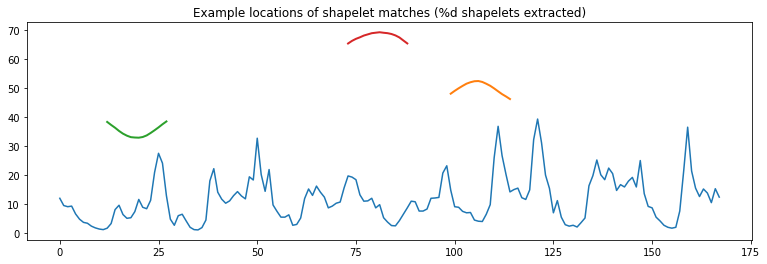

In [ ]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)

# T

In [ ]:
bomba = cutbyweeks(df['T'])

In [ ]:
new = np.array(bomba)
new.shape

(53, 168)

In [ ]:
X = new

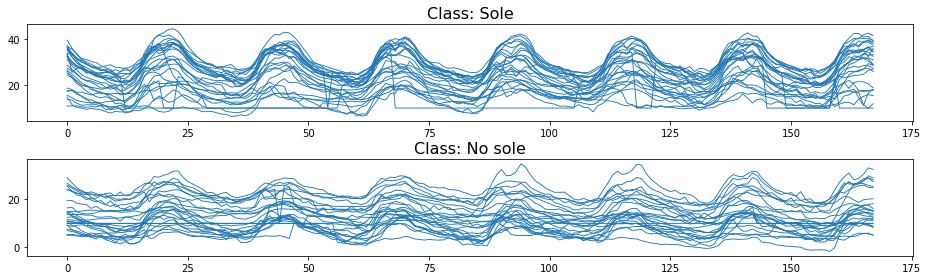

In [ ]:
plt.figure()
for i, classe in enumerate(['Sole', 'No sole']):
    plt.subplot(2, 1, i + 1)
    for x in X[y == i]:
        plt.plot(x, color='C0', linewidth=0.9)
    plt.title('Class: {}'.format(classe), fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.4)
plt.show()

In [ ]:
n_ts, ts_sz = X_train.shape
n_classes = len(set(y))

# Set the number of shapelets per size as done in the original paper
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=n_ts,
                                                       ts_sz=ts_sz,
                                                       n_classes=n_classes,
                                                       l=0.1,
                                                       r=1)

print('n_ts', n_ts)
print('ts_sz', ts_sz)
print('n_classes', n_classes)
print('shapelet_sizes', shapelet_sizes)

n_ts 42
ts_sz 168
n_classes 2
shapelet_sizes {16: 3}


In [ ]:
# Define the model using parameters provided by the authors (except that we use
# fewer iterations here)
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd",
                        weight_regularizer=.01,
                        max_iter=200,
                        verbose=1)

/usr/local/lib/python3.6/dist-packages/tslearn/shapelets.py:363: FutureWarning: The default value for 'scale' is set to False in version 0.4 to ensure backward compatibility, but is likely to change in a future version.
  FutureWarning)


In [ ]:
shp_clf.fit(X_train, y_train)

Epoch 1/200
1/1 [==============================] - 0s 1ms/step - loss: 50.2186 - binary_accuracy: 0.5000 - binary_crossentropy: 50.1980
Epoch 2/200
1/1 [==============================] - 0s 2ms/step - loss: 13.2333 - binary_accuracy: 0.5952 - binary_crossentropy: 13.2175
Epoch 3/200
1/1 [==============================] - 0s 2ms/step - loss: 11.6938 - binary_accuracy: 0.6190 - binary_crossentropy: 11.6805
Epoch 4/200
1/1 [==============================] - 0s 1ms/step - loss: 10.2336 - binary_accuracy: 0.6190 - binary_crossentropy: 10.2225
Epoch 5/200
1/1 [==============================] - 0s 2ms/step - loss: 8.8846 - binary_accuracy: 0.5952 - binary_crossentropy: 8.8754
Epoch 6/200
1/1 [==============================] - 0s 1ms/step - loss: 7.6756 - binary_accuracy: 0.6190 - binary_crossentropy: 7.6681
Epoch 7/200
1/1 [==============================] - 0s 1ms/step - loss: 6.5305 - binary_accuracy: 0.6190 - binary_crossentropy: 6.5244
Epoch 8/200
1/1 [==============================] - 0s 

LearningShapelets(batch_size=256, max_iter=200, max_size=None,
                  n_shapelets_per_size={16: 3}, optimizer='sgd',
                  random_state=None, scale=False, shapelet_length=0.15,
                  total_lengths=3, verbose=1, weight_regularizer=0.01)

In [ ]:
predicted_labels = shp_clf.predict(X_test)
print("Correct classification rate:", accuracy_score(y_test, predicted_labels))

1/1 [==============================] - 0s 912us/step
Correct classification rate: 0.6363636363636364


In [ ]:
predicted_locations = shp_clf.locate(X_test)

1/1 [==============================] - 0s 2ms/step


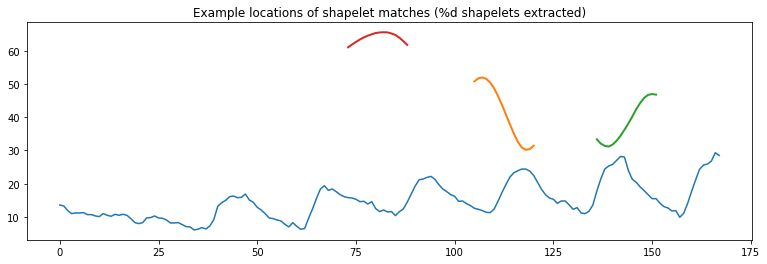

In [ ]:
ts_id = 0
plt.figure()
n_shapelets = sum(shapelet_sizes.values())
plt.title("Example locations of shapelet matches "
          "(%d shapelets extracted)".format(n_shapelets))

plt.plot(X[ts_id].ravel())
for idx_shp, shp in enumerate(shp_clf.shapelets_):
    t0 = predicted_locations[ts_id, idx_shp]
    plt.plot(np.arange(t0, t0 + len(shp)), shp, linewidth=2)